# 1. Data Exploration

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data

* **id**:                               listing ID
* **name**:                             name of the listing
* **host_id**:                          host ID
* **host_name**:                        name of the host
* **neighbourhood_group**:              location
* **neighbourhood**:                    area
* **latitude**:                         latitude coordinates
* **longitude**:                        longitude coordinates
* **room_type**:                        listing space type
* **price**:                            price in dollars
* **minimum_nights**:                   amount of nights minimum
* **number_of_reviews**:                number of reviews
* **last_review**:                      latest review
* **reviews_per_month**:                number of reviews per month
* **calculated_host_listings_count**:   amount of listing per host
* **availability_365**:                 number of days when listing is available for booking

## A. Import Files

In [240]:
# package needed for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [241]:
data = pd.read_csv('../data/raw/AB_NYC_2019.csv')

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [243]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [244]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [245]:
data.shape

(48895, 16)

## B. Data Cleaning

I want to drop all the columns that will not be part of this code

In [246]:
data.drop(['name','id','host_id', 'host_name','last_review'], axis=1, inplace=True)


In [247]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replace all the null value with 0

In [248]:
data['reviews_per_month'].fillna(0, inplace=True)

In [249]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## C. Visualization

### Neighbourhood Group

In [250]:
import plotly.express as px

In [251]:
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Text(0.5, 1.0, 'Neighbourhood')

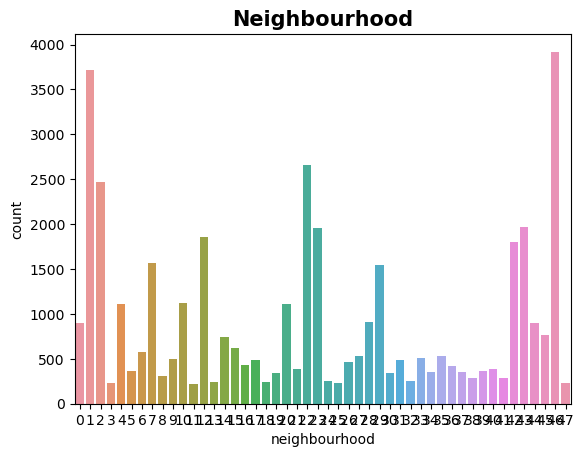

In [282]:
sns.countplot(x="neighbourhood", data=data)
plt.title("Neighbourhood",size=15, weight='bold')

### Price Distribuation

In [253]:
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [254]:
len(data['neighbourhood'])

48895

In [255]:
data = data.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)

In [256]:
len(data["neighbourhood"])

42276

In [257]:
data['neighbourhood_group'].value_counts()

Manhattan    20885
Brooklyn     17730
Queens        3661
Name: neighbourhood_group, dtype: int64

# D. Future engineering

### Encoding categorical variables

In [258]:
data['neighbourhood_group']= data['neighbourhood_group'].astype("category").cat.codes
data['neighbourhood'] = data['neighbourhood'].astype("category").cat.codes
data['room_type'] = data['room_type'].astype("category").cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42276 entries, 1 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             42276 non-null  int8   
 1   neighbourhood                   42276 non-null  int8   
 2   latitude                        42276 non-null  float64
 3   longitude                       42276 non-null  float64
 4   room_type                       42276 non-null  int8   
 5   price                           42276 non-null  int64  
 6   minimum_nights                  42276 non-null  int64  
 7   number_of_reviews               42276 non-null  int64  
 8   reviews_per_month               42276 non-null  float64
 9   calculated_host_listings_count  42276 non-null  int64  
 10  availability_365                42276 non-null  int64  
dtypes: float64(3), int64(5), int8(3)
memory usage: 3.0 MB


### Heat Map

Text(0.5, 1.0, 'Correlation Matrix')

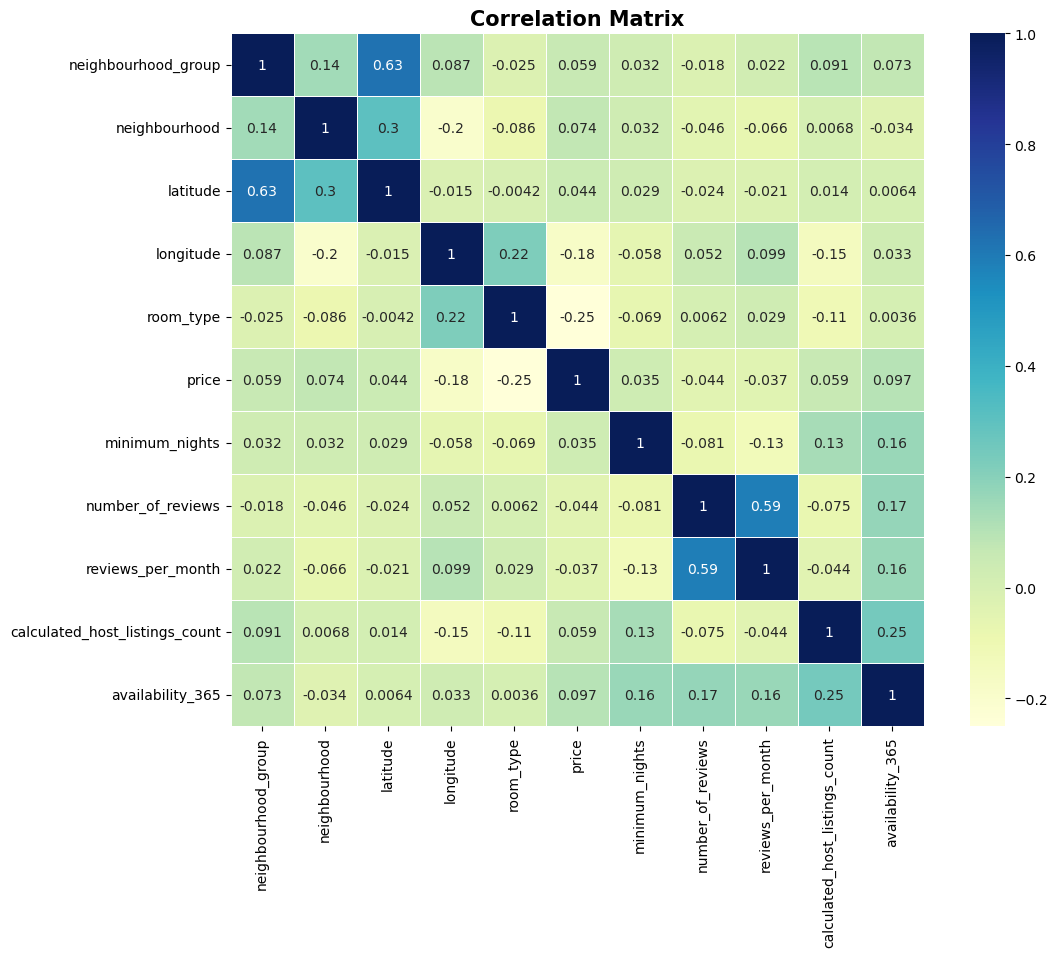

In [259]:
corrmat = data.corr(method='pearson')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", square=True, linewidths=.5)
plt.title("Correlation Matrix",size=15, weight='bold')

In [260]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews']

In [261]:
all_data=data[feature_columns]
all_data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
1,1,0,225,1,45
2,1,1,150,3,0
3,0,0,89,1,270
4,1,0,80,10,9
5,1,0,200,3,74


In [262]:
all_data['room_type']=all_data['room_type'].factorize()[0]
all_data['neighbourhood_group']=all_data['neighbourhood_group'].factorize()[0]

/var/folders/6w/js_5z4xs7cv__kfsgg74twqh0000gn/T/ipykernel_958/4003936312.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6w/js_5z4xs7cv__kfsgg74twqh0000gn/T/ipykernel_958/4003936312.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
all_data.head()


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
1,0,0,225,1,45
2,0,1,150,3,0
3,1,0,89,1,270
4,0,0,80,10,9
5,0,0,200,3,74


### Train test split

In [264]:
from sklearn.model_selection import train_test_split

y = all_data['price']
X= all_data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)

# E. Modelling

In [265]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

linear_regression_scores = cross_val_score(LinearRegression(), X, y, cv=cv)
ridge_scores = cross_val_score(Ridge(), X, y, cv=cv)
lasso_scores = cross_val_score(Lasso(), X, y, cv=cv)
random_forest_scores = cross_val_score(RandomForestClassifier(), X, y, cv=cv)

linear_regression_avg = linear_regression_scores.mean()
ridge_avg = ridge_scores.mean()
lasso_avg = lasso_scores.mean()
random_forest_avg = random_forest_scores.mean()

print(f"Linear Regression Average Score: {linear_regression_avg}")
print(f"Ridge Regression Average Score: {ridge_avg}")
print(f"Lasso Average Score: {lasso_avg}")
print(f"Random Forest Average Score: {random_forest_avg}")

best_score = max(linear_regression_avg, ridge_avg, lasso_avg, random_forest_avg)
best_model = ''
if best_score == linear_regression_avg:
    best_model = 'Linear Regression'
elif best_score == ridge_avg:
    best_model = 'Ridge Regression'
elif best_score == lasso_avg:
    best_model = 'Lasso'
else:
    best_model = 'Random Forest'

print(f"\nThe best model is {best_model} with an average score of {best_score}")


Linear Regression Average Score: 0.09687284949119929
Ridge Regression Average Score: 0.0968727613272915
Lasso Average Score: 0.09672643144463888
Random Forest Average Score: 0.052891438032166505

The best model is Linear Regression with an average score of 0.09687284949119929


**now we know the best model is random forest**

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.1020800215952653

# E. Predict price

In [267]:
import numpy as np

In [268]:
def predict_price(neighbourhood_group, room_type, minimum_nights, number_of_reviews):
    loc_index = np.where(X.columns==neighbourhood_group)[0]
    
    x = np.zeros(len(X.columns))
    x[0] = neighbourhood_group
    x[1] = room_type
    x[2] = minimum_nights
    x[3] = number_of_reviews
    if loc_index >= 0:
        x[loc_index] = 1
    
    return model.predict([x])[0]

In [269]:
all_data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
1,0,0,225,1,45
2,0,1,150,3,0
3,1,0,89,1,270
4,0,0,80,10,9
5,0,0,200,3,74


In [270]:
predict_price(0, 0, 1, 45)

/var/folders/6w/js_5z4xs7cv__kfsgg74twqh0000gn/T/ipykernel_958/3042748482.py:9: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



226.23680799100927

In [271]:
predict_price(0, 1, 3, 0)

/var/folders/6w/js_5z4xs7cv__kfsgg74twqh0000gn/T/ipykernel_958/3042748482.py:9: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



134.40365887122297